In [47]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = "notebook", style = "darkgrid")
n_draws = 100000
prior = np.random.uniform(0, 1, size=n_draws)


In [48]:
def generative_model(n, p):
    result = np.random.binomial(n, p)
    return result

In [49]:
observed = (50, 10)
sim_data = list()
for p in prior:
    sim_data.append(generative_model(observed[0], p))

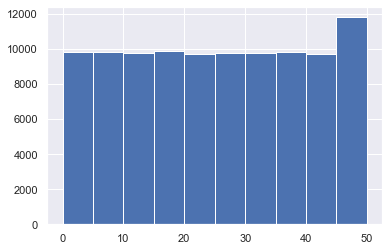

In [50]:
plt.hist(sim_data);

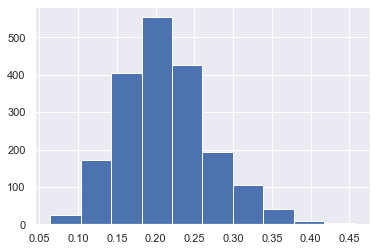

In [51]:
posterior = prior[list(map(lambda x: x == observed[1], sim_data))]
plt.hist(posterior);

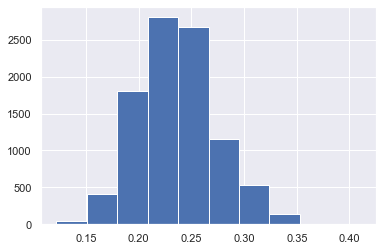

In [52]:
observed = (83, 21)
sim_data = list()
prior = np.array(list(posterior) * 100)
for p in prior:
        sim_data.append(generative_model(observed[0], p))

posterior = prior[list(map(lambda x: x == observed[1], sim_data))]
plt.hist(posterior);

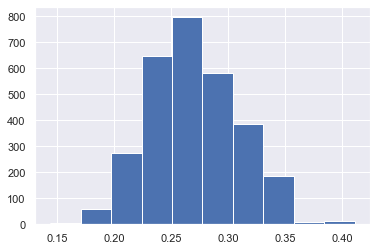

In [53]:
observed = (10, 7)
sim_data = list()
prior = np.array(list(posterior) * 100)
for p in prior:
        sim_data.append(generative_model(observed[0], p))

posterior = prior[list(map(lambda x: x == observed[1], sim_data))]
plt.hist(posterior);